In [1]:
import ucdeconvolve as ucd
import scanpy as sc
import stlearn as st
import numpy
import matplotlib.pyplot as plt
import matplotlib
import scipy

/home/uqacause/.conda/envs/stlearn/lib/python3.9/site-packages/stlearn/tools/microenv/cci/het.py:192: NumbaDeprecationWarning: The keyword argument 'nopython=False' was supplied. From Numba 0.59.0 the default is being changed to True and use of 'nopython=False' will raise a warning as the argument will have no effect. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit(parallel=True, nopython=False)


In [2]:
ucd.api.authenticate("uc_B71UGPlwxWaLqfLBl39hq8qutf57bccSDqfyorYlC9uwboSe")

2024-04-11 14:00:17,691|[UCD]|INFO: Updated valid user access token.


In [ ]:
st

In [4]:
data = st.Read10X("/QRISdata/Q1851/Andrew_C/Metabolomics/Test_data/public_data/V11T17-101/V11T17-101_C1/output_data/V11T17-101_C1/outs/")
data.raw = data
sc.pp.recipe_seurat(data)

sc.pp.pca(data)
sc.pp.neighbors(data)
sc.tl.leiden(data)
sc.tl.umap(data)

/home/uqacause/.conda/envs/stlearn/lib/python3.9/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/uqacause/.conda/envs/stlearn/lib/python3.9/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/uqacause/.conda/envs/stlearn/lib/python3.9/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/uqacause/.conda/envs/stlearn/lib/python3.9/site-packages/umap/distances.py:1

NameError: name 'sample' is not defined

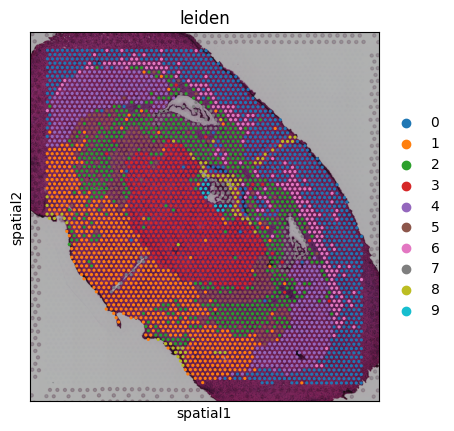

In [5]:
sc.pl.spatial(data, color = 'leiden')

In [6]:
ucd.tl.base(data)

2024-04-11 14:02:45,915|[UCD]|INFO: Starting UCDeconvolveBASE Run. | Timer Started.
Preprocessing Dataset | 100% (15 of 15) || Elapsed Time: 0:00:02 Time:  0:00:02
2024-04-11 14:02:50,791|[UCD]|INFO: Uploading Data | Timer Started.
2024-04-11 14:03:02,513|[UCD]|INFO: Upload Complete | Elapsed Time: 11.721 (s)
Waiting For Submission : RUNNING | Queue Size : 1 | | |#| 3 Elapsed Time: 0:00:06
Waiting For Completion | 100% (3759 of 3759) || Elapsed Time: 0:00:37 Time:  0:00:37
2024-04-11 14:03:49,986|[UCD]|INFO: Download Results | Timer Started.
2024-04-11 14:03:53,250|[UCD]|INFO: Download Complete | Elapsed Time: 3.263 (s)
2024-04-11 14:03:54,344|[UCD]|INFO: Run Complete | Elapsed Time: 68.428 (s)


In [8]:
ucd.utils.assign_top_celltypes(data, category = "raw", groupby = "leiden")

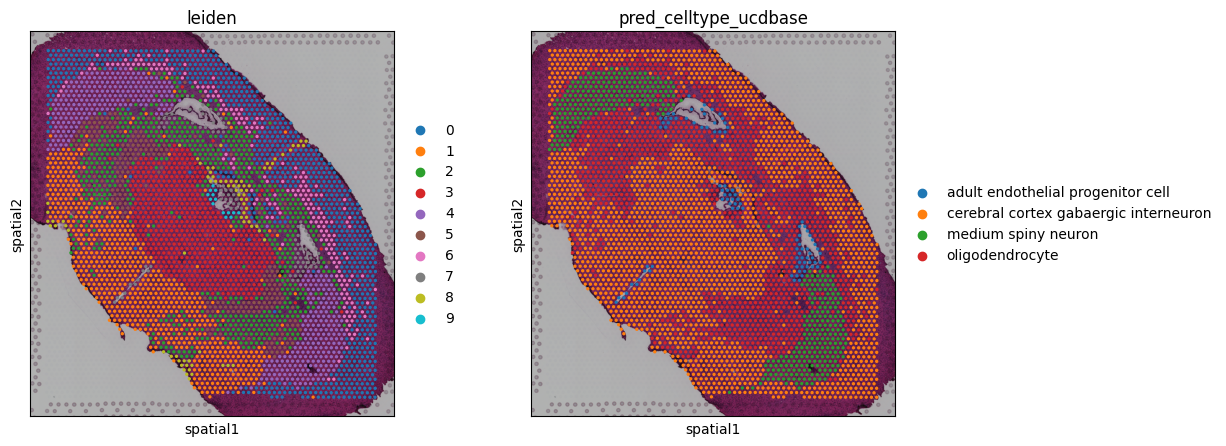

In [9]:
matplotlib.rcParams['figure.figsize'] = [5, 5]

sc.pl.spatial(data, color = ["leiden","pred_celltype_ucdbase"])

In [10]:
ucd.utils.read_results(data, category = 'raw').head(5)

,cerebral cortex gabaergic interneuron,oligodendrocyte,pyramidal neuron,mononuclear cell,medium spiny neuron,bergmann glial cell,cerebral cortex neuron,serotonergic neuron,polydendrocyte,hippocampal granule cell,...,supporting cell of cochlea,oviduct glandular cell,natural killer cell cell,unknown,contractile cell,bone marrow cell,kidney granular cell,oogonial cell,pancreatic epsilon cell,splenic red pulp macrophagec
AAACAACGAATAGTTC-1,0.364022,0.001180,0.225770,0.041223,0.000031,0.069530,0.115549,0.002099,0.000787,0.012746,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACAAGTATCTCCCA-1,0.072728,0.252743,0.006340,0.044382,0.351758,0.007276,0.004510,0.000761,0.061544,0.014736,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACAATCTACTAGCA-1,0.196938,0.101167,0.317358,0.132347,0.000395,0.000138,0.051279,0.018203,0.022558,0.006571,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACAGCTTTCAGAAG-1,0.049779,0.240916,0.002682,0.175792,0.000522,0.023467,0.000105,0.093949,0.060348,0.001952,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACAGGGTCTATATT-1,0.417465,0.155284,0.000252,0.111190,0.000452,0.017153,0.000069,0.140942,0.048729,0.006974,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<Axes: xlabel='spatial1', ylabel='spatial2'>

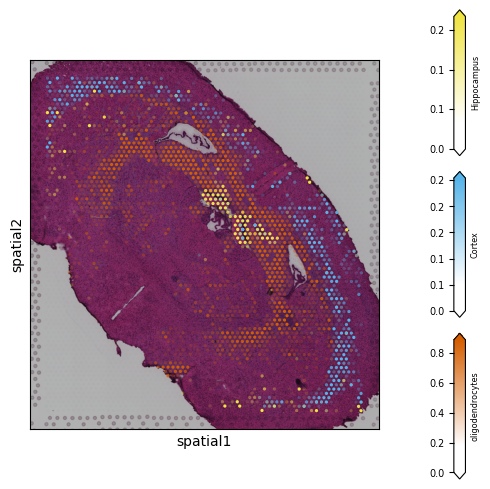

In [13]:
ucd.pl.spatial(data,
    color = ["hippocampal granule cell", "cerebral cortex neuron", "oligodendrocyte"],
    labels = ['Hippocampus', "Cortex", "oligodendrocytes"],
    colormaps = [ucd.pl.CM.Yellow, ucd.pl.CM.Blue, ucd.pl.CM.Orange],
    cbar_nrows=3
)